In [2]:
import seaborn as sns; sns.set()
iris = sns.load_dataset("iris")
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/home/jose/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


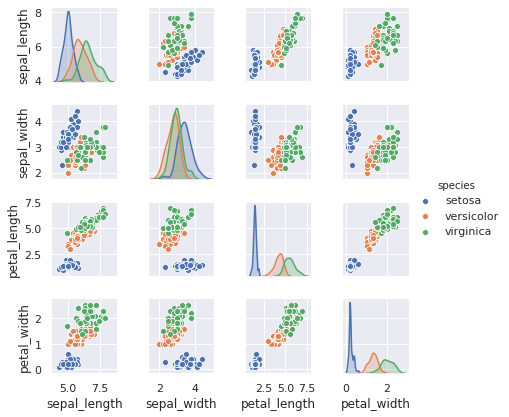

In [3]:
sns.pairplot(iris, hue="species", size=1.5)

In [4]:
X_iris = iris.drop("species", axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris["species"]
y_iris.shape

(150,)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=1)
X_train.shape

(112, 4)

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
model.score(X_test, y_test)

0.9736842105263158

In [12]:
y_model = model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.9736842105263158

# Unsupervised


In [17]:
# Dimensionality reduction

# Principal Component Analysis

from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)
X_2D.shape

(150, 2)

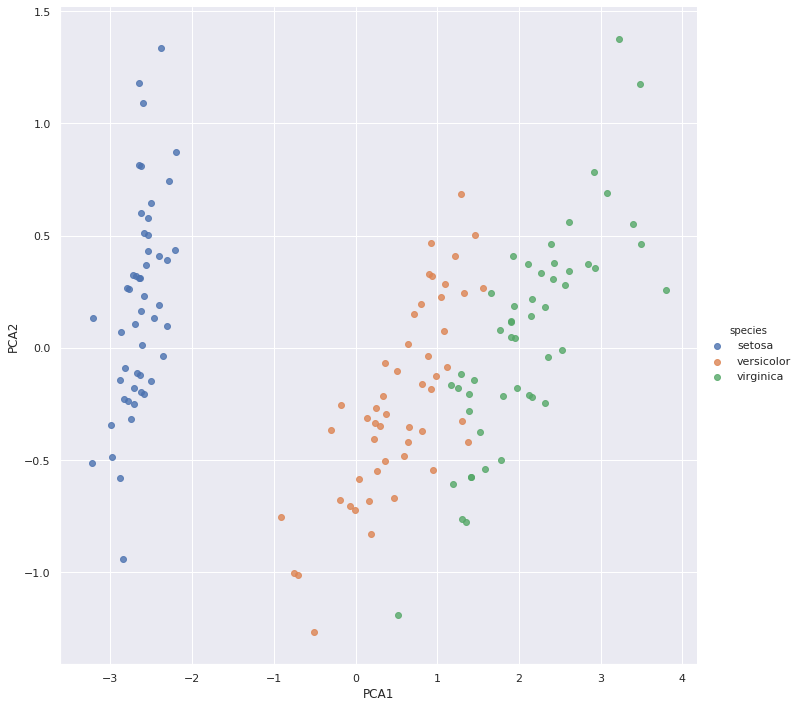

In [20]:
iris["PCA1"] = X_2D[:, 0]
iris["PCA2"] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue="species", data=iris, fit_reg=False, height=10)

In [21]:
# Clustering
# Gaussias Mixture Model
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type="full")
model.fit(X_test)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [25]:
y_gmm = model.predict(X_iris)
y_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

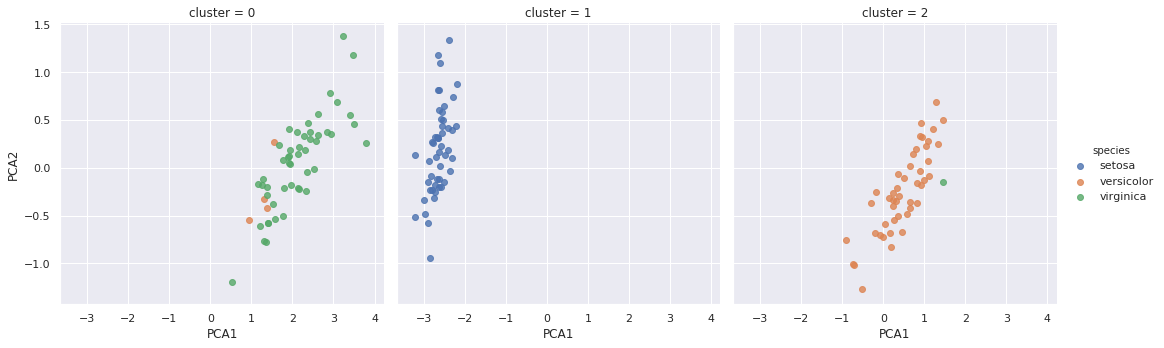

In [26]:
iris["cluster"] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue="species", col="cluster", fit_reg=False)